In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
sales1 = pd.read_csv('sales1.csv')
sales1

,Book title,Number sold,Sales price,Royalty paid
0,The Bricklayer’s Bible,8,2.99,0.55
1,Swimrand,2,1.99,0.35
2,Pining For The Fisheries of Yore,28,2.99,0.55
3,The Duck Goes Here,34,2.99,0.55
4,The Tower Commission Report,4,11.50,4.25


In [4]:
sales2 = pd.read_csv('sales2.csv')
sales2.fillna('')

,Title,Units sold,List price,Royalty
0,,,,
1,Sales report for Q1,,,
2,E-Book Reader US Store,,,
3,Pining for the Fisheries of Yore,80,3.5,14.98
4,Swimrand,1,2.99,0.14
5,The Bricklayer's Bible,17,3.5,5.15
6,US royalties (GBP),,,22.25
7,Sales report for Q1,,,
8,The Duck Goes Here,34,2.99,5.78
9,The Tower Commission Report,4,9.5,6.2


### Challenge: first combine these sales together into a single dataframe, then compute the average amount consumers spent in each quarter for each currency.

Rename the column names to match those of sales2 or vice versa to enable concatenation

In [5]:
s = sales1
s = s.rename(columns={
   "Book title": "Title",
   "Number sold": "Units sold",
   "Sales price": "List price",
   "Royalty paid": "Royalty"
  })
s.head()

,Title,Units sold,List price,Royalty
0,The Bricklayer’s Bible,8,2.99,0.55
1,Swimrand,2,1.99,0.35
2,Pining For The Fisheries of Yore,28,2.99,0.55
3,The Duck Goes Here,34,2.99,0.55
4,The Tower Commission Report,4,11.50,4.25


Concatenate the dataframes

In [6]:
count_sales1 = len(sales1)
joint_sales = pd\
  .concat([s, sales2])\
  .reset_index(drop=True)
joint_sales.head(10)

,Title,Units sold,List price,Royalty
0,The Bricklayer’s Bible,8.0,2.99,0.55
1,Swimrand,2.0,1.99,0.35
2,Pining For The Fisheries of Yore,28.0,2.99,0.55
3,The Duck Goes Here,34.0,2.99,0.55
4,The Tower Commission Report,4.0,11.50,4.25
5,NaN,NaN,NaN,NaN
6,Sales report for Q1,NaN,NaN,NaN
7,E-Book Reader US Store,NaN,NaN,NaN
8,Pining for the Fisheries of Yore,80.0,3.50,14.98
9,Swimrand,1.0,2.99,0.14


Preview the tail to see that the index was also reset

In [7]:
joint_sales.tail()

,Title,Units sold,List price,Royalty
26,Sales report for Q4,NaN,NaN,NaN
27,E-Book Reader France Store,NaN,NaN,NaN
28,Swimrand,8.0,1.99,0.88
29,The Duck Goes Here,12.0,1.99,1.50
30,France royalties (EUR),NaN,NaN,2.38


Use loc to slice joint_sales and assign USD to a new column Currency for the slice

In [8]:
joint_sales.loc[0:count_sales1, "Currency"] = "USD"
joint_sales.loc[0:count_sales1, "Quarter"] = "Q3"
joint_sales.head()

,Title,Units sold,List price,Royalty,Currency,Quarter
0,The Bricklayer’s Bible,8.0,2.99,0.55,USD,Q3
1,Swimrand,2.0,1.99,0.35,USD,Q3
2,Pining For The Fisheries of Yore,28.0,2.99,0.55,USD,Q3
3,The Duck Goes Here,34.0,2.99,0.55,USD,Q3
4,The Tower Commission Report,4.0,11.50,4.25,USD,Q3


In [9]:
joint_sales.tail()

,Title,Units sold,List price,Royalty,Currency,Quarter
26,Sales report for Q4,NaN,NaN,NaN,NaN,NaN
27,E-Book Reader France Store,NaN,NaN,NaN,NaN,NaN
28,Swimrand,8.0,1.99,0.88,NaN,NaN
29,The Duck Goes Here,12.0,1.99,1.50,NaN,NaN
30,France royalties (EUR),NaN,NaN,2.38,NaN,NaN


Extract the currency for sales2 from the title column

In [10]:
currencies = joint_sales["Title"].str.extract(r'\(([A-Z]{3,})\)$', expand=False) # preview row at index 28 and expect to  have EUR
currencies.loc[28]

nan

Add the currencies Series to the joint sales from the index of sales1

In [11]:
joint_sales.loc[count_sales1:, "Currency"] = currencies
joint_sales.tail()

,Title,Units sold,List price,Royalty,Currency,Quarter
26,Sales report for Q4,NaN,NaN,NaN,NaN,NaN
27,E-Book Reader France Store,NaN,NaN,NaN,NaN,NaN
28,Swimrand,8.0,1.99,0.88,NaN,NaN
29,The Duck Goes Here,12.0,1.99,1.50,NaN,NaN
30,France royalties (EUR),NaN,NaN,2.38,EUR,NaN


Fill NaN using the NEXT valid item i.e. backfill/bfill

In [12]:
joint_sales["Currency"] = joint_sales["Currency"].fillna(method="backfill")
joint_sales.head(10)

,Title,Units sold,List price,Royalty,Currency,Quarter
0,The Bricklayer’s Bible,8.0,2.99,0.55,USD,Q3
1,Swimrand,2.0,1.99,0.35,USD,Q3
2,Pining For The Fisheries of Yore,28.0,2.99,0.55,USD,Q3
3,The Duck Goes Here,34.0,2.99,0.55,USD,Q3
4,The Tower Commission Report,4.0,11.50,4.25,USD,Q3
5,NaN,NaN,NaN,NaN,GBP,Q3
6,Sales report for Q1,NaN,NaN,NaN,GBP,NaN
7,E-Book Reader US Store,NaN,NaN,NaN,GBP,NaN
8,Pining for the Fisheries of Yore,80.0,3.50,14.98,GBP,NaN
9,Swimrand,1.0,2.99,0.14,GBP,NaN


In [13]:
joint_sales.tail()

,Title,Units sold,List price,Royalty,Currency,Quarter
26,Sales report for Q4,NaN,NaN,NaN,EUR,NaN
27,E-Book Reader France Store,NaN,NaN,NaN,EUR,NaN
28,Swimrand,8.0,1.99,0.88,EUR,NaN
29,The Duck Goes Here,12.0,1.99,1.50,EUR,NaN
30,France royalties (EUR),NaN,NaN,2.38,EUR,NaN


Extract the Quarter from Title

In [14]:
quarters = joint_sales.Title.str.extract(r'(Q[1-4])$', expand=False)
quarters[6]

'Q1'

Add the quarters to joint sales from sales1 last index

In [15]:
joint_sales.loc[count_sales1:, "Quarter"] = quarters
joint_sales.head()

,Title,Units sold,List price,Royalty,Currency,Quarter
0,The Bricklayer’s Bible,8.0,2.99,0.55,USD,Q3
1,Swimrand,2.0,1.99,0.35,USD,Q3
2,Pining For The Fisheries of Yore,28.0,2.99,0.55,USD,Q3
3,The Duck Goes Here,34.0,2.99,0.55,USD,Q3
4,The Tower Commission Report,4.0,11.50,4.25,USD,Q3


In [16]:
joint_sales.tail()

,Title,Units sold,List price,Royalty,Currency,Quarter
26,Sales report for Q4,NaN,NaN,NaN,EUR,Q4
27,E-Book Reader France Store,NaN,NaN,NaN,EUR,NaN
28,Swimrand,8.0,1.99,0.88,EUR,NaN
29,The Duck Goes Here,12.0,1.99,1.50,EUR,NaN
30,France royalties (EUR),NaN,NaN,2.38,EUR,NaN


Fill the Quarters NaN with the LAST valid value in that Series i.e. ffill/pad

In [17]:
joint_sales["Quarter"] = joint_sales["Quarter"].fillna(method="ffill")
joint_sales.head(10)

,Title,Units sold,List price,Royalty,Currency,Quarter
0,The Bricklayer’s Bible,8.0,2.99,0.55,USD,Q3
1,Swimrand,2.0,1.99,0.35,USD,Q3
2,Pining For The Fisheries of Yore,28.0,2.99,0.55,USD,Q3
3,The Duck Goes Here,34.0,2.99,0.55,USD,Q3
4,The Tower Commission Report,4.0,11.50,4.25,USD,Q3
5,NaN,NaN,NaN,NaN,GBP,Q3
6,Sales report for Q1,NaN,NaN,NaN,GBP,Q1
7,E-Book Reader US Store,NaN,NaN,NaN,GBP,Q1
8,Pining for the Fisheries of Yore,80.0,3.50,14.98,GBP,Q1
9,Swimrand,1.0,2.99,0.14,GBP,Q1


Remove unnecessary rows where Units Sold is NaN

In [18]:
joint_sales = joint_sales.dropna(subset=["Units sold"])
joint_sales.head(10)

,Title,Units sold,List price,Royalty,Currency,Quarter
0,The Bricklayer’s Bible,8.0,2.99,0.55,USD,Q3
1,Swimrand,2.0,1.99,0.35,USD,Q3
2,Pining For The Fisheries of Yore,28.0,2.99,0.55,USD,Q3
3,The Duck Goes Here,34.0,2.99,0.55,USD,Q3
4,The Tower Commission Report,4.0,11.50,4.25,USD,Q3
8,Pining for the Fisheries of Yore,80.0,3.50,14.98,GBP,Q1
9,Swimrand,1.0,2.99,0.14,GBP,Q1
10,The Bricklayer's Bible,17.0,3.50,5.15,GBP,Q1
13,The Duck Goes Here,34.0,2.99,5.78,USD,Q1
14,The Tower Commission Report,4.0,9.50,6.20,USD,Q1


Group the cleaned data by Quarter and Currency and accumulate by the average revenue

In [19]:
joint_sales["Revenue"] = joint_sales["Units sold"] * joint_sales["List price"]
avg_rev = joint_sales.groupby(["Quarter", "Currency"]).Revenue.mean()

Unstack the Currency

In [20]:
avg_rev = avg_rev.unstack("Currency")
avg_rev

Currency,EUR,GBP,USD
Quarter,,,
Q1,NaN,114.163333,69.830
Q2,NaN,72.453333,NaN
Q3,NaN,NaN,51.856
Q4,19.9,NaN,NaN


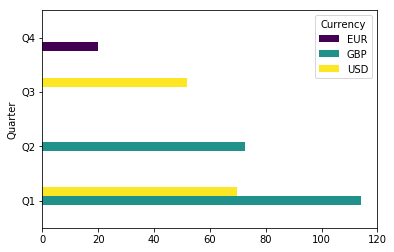

In [21]:
avg_rev.plot(kind="barh", stacked=False, colormap='viridis')